In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [2]:
data = load_breast_cancer(as_frame=True)


train_data = data.data.iloc[:400]
train_target = data.target.iloc[:400]
test_data = data.data.iloc[400:]
test_target = data.target.iloc[400:]

train = pd.concat([train_data, train_target], axis=1)
test = pd.concat([test_data, test_target], axis=1)
train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,14.06,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.032510,0.1641,0.05764,...,25.34,96.42,684.5,0.10660,0.1231,0.0846,0.07911,0.2523,0.06609,1
396,13.51,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.053810,0.1806,0.06079,...,27.20,97.33,675.2,0.14280,0.2570,0.3438,0.14530,0.2666,0.07686,1
397,12.80,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.040830,0.1574,0.05750,...,21.06,90.72,591.0,0.09534,0.1812,0.1901,0.08296,0.1988,0.07053,1
398,11.06,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,0.1535,0.06214,...,20.35,80.79,496.7,0.11200,0.1879,0.2079,0.05556,0.2590,0.09158,1


## 测试fit best model and get_predict

In [34]:
from ppp_prediction.model import fit_best_model, get_predict

# test fit_best_model
X_var = [col for col in train.columns if col != "target"]
model, train_metrics, test_metrics, *_ = fit_best_model(
    train,
    test,
    X_var=X_var,
    y_var="target",
    method_list=["Lasso"],
    cv=2,
)

[I] [13:27:43.545785] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (360, 30), val shape is (40, 30), test shape is (169, 30)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.02782559402207126}, with auc: 0.9974999999999999


In [35]:
_[1]

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target_pred
400,0,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,...,27.78,149.60,1304.0,0.18730,0.59170,0.90340,0.19640,0.3245,0.11980,0.141415
401,1,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,...,20.14,87.64,589.5,0.13740,0.15750,0.15140,0.06876,0.2460,0.07262,0.883748
402,1,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,...,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247,0.854993
403,1,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,...,23.02,89.69,580.9,0.11720,0.19580,0.18100,0.08388,0.3297,0.07834,0.814587
404,1,12.34,14.95,78.29,469.1,0.08682,0.04571,0.02109,0.02054,0.1571,...,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974,1.000902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,-0.057476
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,0.090381
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,0.357164
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400,-0.339952


In [ ]:
# from sklearn.pipeline import Pipeline
# from typing import Union, List
# from sklearn.utils._metadata_requests import process_routing
# import numpy as np


# def get_predict(
#     pipline: Pipeline,
#     data,
#     x_var: Union[List, str, None] = None,
#     exclude: Union[List, str, None] = None,
#     **params
# ):

#     if x_var is not None or exclude is not None:
#         # currently only supported with scaler + model
#         routed_params = process_routing(pipline, "predict", **params)
#         Xt = data
#         for _, name, transform in pipline._iter(with_final=False):
#             Xt = transform.transform(Xt, **routed_params[name].transform)

#         last_model = pipline.steps[-1][1]
#         assert hasattr(last_model, "coef_") and hasattr(
#             last_model, "intercept_"
#         ), "pipline last step must have coef_ and intercept_ attributes."

#         if hasattr(pipline, "feature_names_in_"):
#             feature_names_in_ = pipline.feature_names_in_
#         elif hasattr(last_model, "feature_names_in_"):
#             feature_names_in_ = last_model.feature_names_in_
#         else:
#             raise ValueError(
#                 "pipline or last_model must have feature_names_in_ attribute to select"
#             )
#         coef_ = last_model.coef_
#         intercept_ = last_model.intercept_

#         if exclude:
#             exclude = [exclude] if isinstance(exclude, str) else exclude
#             x_var = list(set(feature_names_in_) - set(exclude))
#         x_var = [x_var] if isinstance(x_var, str) else x_var

#         chosed_var_index = np.isin(feature_names_in_, x_var)

#         coef_ = coef_[chosed_var_index]

#         Xt = Xt[:, chosed_var_index]

#         if coef_.ndim == 1:
#             return Xt @ coef_ + intercept_
#         else:
#             return Xt @ coef_.T + intercept_
#     else:
#         return pipline.predict(data)

In [ ]:
import numpy as np

assert (
    get_predict(model, train_data, x_var=None) == model.predict(train_data)
).all(), "get_predict get wrong result"

x_var = train_data.columns[[3, 5, 7, 1]]

scaler = model["scaler"]
last_model = model["model"]
scaler_x = scaler.transform(train_data)
coef_, intercept_ = last_model.coef_, last_model.intercept_
feature_names_in_ = model.feature_names_in_
selected_index = np.isin(feature_names_in_, x_var)
coef_ = coef_[selected_index]
scaler_x = scaler_x[:, selected_index]


old_way_score = scaler_x @ coef_ + intercept_

assert (
    old_way_score == get_predict(model, train_data, x_var=x_var)
).all(), "get_predict get wrong result"

print(f"Passing all test")

In [ ]:
# scaler = model["scaler"]
# lasso = model["model"]
# scaler

# from cuml.linear_model import lasso

# def predict(self, X, used_vars):
#     check_is_fitted(self)
# train_data
# scaler_x = scaler.transform(train_data)[:10]
# scaler_x
# scaler_x.shape, lasso.coef_.shape
# # X @ coef_ + self.intercept_
# lasso.intercept_
# (scaler_x @ lasso.coef_) + lasso.intercept_
# # lasso.intercept_value
# lasso.selection
# model.predict(train_data[:10])

# mean_ = scaler.mean_
# scaler_ = scaler.scale_
# feature_names_in_ = scaler.feature_names_in_

# (train[feature_names_in_] - mean_) / scaler_
# scaler.mean_ = scaler.mean_[:28]
# scaler.scale_ = scaler.scale_[:28]
# scaler.feature_names_in_ = scaler.feature_names_in_[:28]
# scaler.n_features_in_ = 28
# scaler.transform(train[scaler.feature_names_in_[:28]])[:3, :3]

# scaler.feature_names_in_
# from sklearn.preprocessing import StandardScaler

# assert X_var == model.feature_names_in_.tolist()

## 测试lasso_select_model

In [10]:
# test lasso_select_model
from ppp_prediction.model import lasso_select_model, get_predict, EnsembleModel

save_dir = "./test/lasso_select_model"

X_var = train.columns.tolist()[:-1]
label = "target"

In [4]:
data = pd.read_pickle(
    "/home/xutingfeng/ukb/project/ppp_prediction/results/Meta_Prot/dataset/held_out_training_df.pkl"
)
X_var = data.columns[:100].tolist() + ["age", "sex"]
label = "incident_cad"
cols = X_var + [label]
train = data.head(1000)[cols]
test = data.tail(1000)[cols]


test[label].value_counts()

0.0    924
1.0     46
Name: incident_cad, dtype: int64

Output()

n_jobs: 2


/home/xutingfeng/ukb/project/ppp_prediction/ppp_prediction/model.py:766: TqdmExperimentalWarning: rich is experimental/alpha
  for i in tqdm(random_stats)


[I] [13:58:09.465569] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (867, 102), val shape is (97, 102), test shape is (970, 102)
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[I] [13:58:09.483563] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (868, 102), val shape is (97, 102), test shape is (970, 102)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.003593813663804626}, with auc: 0.8324175824175823


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.00046415888336127773}, with auc: 0.8904494382022472


[I] [13:58:18.876440] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (865, 102), val shape is (97, 102), test shape is (970, 102)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


[I] [13:58:19.315708] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (873, 102), val shape is (97, 102), test shape is (970, 102)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.02782559402207126}, with auc: 0.29473684210526313


[I] [13:58:23.478776] Unused keyword parameter: random_state during cuML estimator initialization


train shape: (862, 102), val shape is (96, 102), test shape is (970, 102)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.003593813663804626}, with auc: 0.7941919191919192
[I] [13:58:25.106171] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (869, 102), val shape is (97, 102), test shape is (970, 102)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.003593813663804626}, with auc: 0.7052556818181819


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.003593813663804626}, with auc: 0.7527472527472527


/home/xutingfeng/ukb/project/ppp_prediction/ppp_prediction/model.py:195: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


cutoff: 10, features num: 102
[I] [13:58:36.195656] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (866, 102), val shape is (97, 102), test shape is (970, 102)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.003593813663804626}, with auc: 0.8934782608695653
cutoff: 20, features num: 100
[I] [13:58:40.590208] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (866, 100), val shape is (97, 100), test shape is (970, 100)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.003593813663804626}, with auc: 0.8934782608695653
cutoff: 30, features num: 100
[I] [13:58:44.685748] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (866, 100), val shape is (97, 100), test shape is (970, 100)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.003593813663804626}, with auc: 0.8934782608695653
cutoff: 40, features num: 89
[I] [13:58:49.028469] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (866, 89), val shape is (97, 89), test shape is (970, 89)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.003593813663804626}, with auc: 0.8934782608695653
cutoff: 50, features num: 61
[I] [13:58:52.111406] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (866, 61), val shape is (97, 61), test shape is (970, 61)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.003593813663804626}, with auc: 0.8956521739130434
cutoff: 60, features num: 61
[I] [13:58:53.846202] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (866, 61), val shape is (97, 61), test shape is (970, 61)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.003593813663804626}, with auc: 0.8956521739130434
cutoff: 70, features num: 26
[I] [13:58:55.663571] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (866, 26), val shape is (97, 26), test shape is (970, 26)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.02782559402207126}, with auc: 0.6195652173913044
cutoff: 80, features num: 26
[I] [13:58:56.686829] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (866, 26), val shape is (97, 26), test shape is (970, 26)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.02782559402207126}, with auc: 0.6195652173913044
cutoff: 90, features num: 2
[I] [13:58:57.629821] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (866, 2), val shape is (97, 2), test shape is (970, 2)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 1e-06}, with auc: 0.6869565217391305


/home/xutingfeng/ukb/project/ppp_prediction/ppp_prediction/model.py:255: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(


best cutoff is 50.0
./test/lasso_select_model/cutoff_models/cutoff_50.0.pkl


<Figure size 432x288 with 0 Axes>

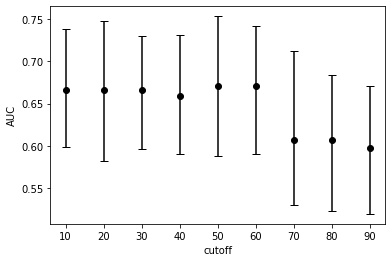

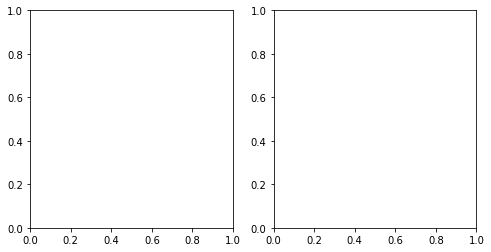

In [5]:
lasso_select_model(
    train,
    test,
    features=X_var,
    label=label,
    n_bootstrap=6,
    cv=2,
    threads=2,
    save_dir=save_dir,
)

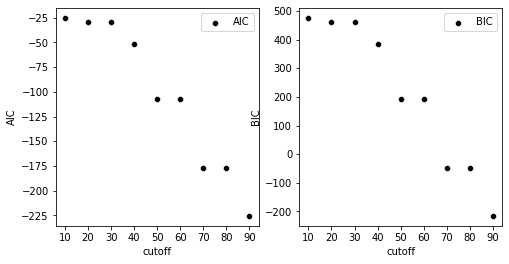

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

cutoff_model_test_metrics_df = pd.read_csv(
    "/home/xutingfeng/ukb/project/ppp_prediction/test/lasso_select_model/test_metrics.csv"
)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()
aic_or_bic = ["AIC", "BIC"]
for idx in range(2):
    ax = axes[idx]
    to_plot_metric = aic_or_bic[idx]
    sns.scatterplot(
        x=cutoff_model_test_metrics_df["cutoff"],
        y=cutoff_model_test_metrics_df[to_plot_metric],
        label=to_plot_metric,
        color="black",
        ax=ax,
    )

In [8]:
cutoff_model_test_metrics_df

,AUC,AUC_UCI,AUC_LCI,ACC,ACC_UCI,ACC_LCI,Macro_F1,Macro_F1_UCI,Macro_F1_LCI,Sensitivity,...,APR_UCI,APR_LCI,N,N_case,N_control,cutoff,AIC,BIC,total_params,total_non_zero_params
0,0.665996,0.738827,0.598800,0.511340,0.542268,0.476289,0.394567,0.418859,0.365124,0.760870,...,0.135468,0.020030,970,46.0,924.0,10,-25.464985,475.126053,102.0,60.0
1,0.665996,0.747824,0.582222,0.511340,0.544330,0.483454,0.394567,0.416519,0.365792,0.760870,...,0.131612,0.015454,970,46.0,924.0,20,-29.464985,461.310543,100.0,60.0
2,0.665996,0.730000,0.596076,0.511340,0.547423,0.483505,0.394567,0.416176,0.370145,0.760870,...,0.130211,0.017858,970,46.0,924.0,30,-29.464985,461.310543,100.0,60.0
3,0.658820,0.731642,0.589596,0.490722,0.514485,0.458634,0.383837,0.407692,0.355777,0.782609,...,0.140972,0.004068,970,46.0,924.0,40,-51.464985,385.325235,89.0,55.0
4,0.670631,0.753457,0.587431,0.518557,0.550541,0.483454,0.398748,0.425386,0.376053,0.760870,...,0.123091,-0.001127,970,46.0,924.0,50,-107.464985,191.908087,61.0,45.0
5,0.670631,0.741560,0.590632,0.518557,0.548557,0.490696,0.398748,0.422900,0.370682,0.760870,...,0.131105,0.014738,970,46.0,924.0,60,-107.464985,191.908087,61.0,45.0
6,0.606508,0.712669,0.529621,0.359794,0.387655,0.331933,0.305593,0.331101,0.278527,0.847826,...,0.127585,0.029580,970,46.0,924.0,70,-177.464985,-49.863348,26.0,2.0
7,0.606508,0.684228,0.522565,0.359794,0.391830,0.332964,0.305593,0.327049,0.274972,0.847826,...,0.124346,0.038252,970,46.0,924.0,80,-177.464985,-49.863348,26.0,2.0
8,0.596720,0.670813,0.519118,0.603093,0.633015,0.574227,0.431419,0.457493,0.407112,0.565217,...,0.126628,0.012106,970,46.0,924.0,90,-225.464985,-215.649475,2.0,2.0
9,0.644469,0.729798,0.565850,0.470103,0.500000,0.437088,0.370403,0.397186,0.345139,0.760870,...,0.108798,0.036948,970,46.0,924.0,ensemble,NaN,NaN,NaN,NaN


In [4]:
EnsembleModel_obj = pd.read_pickle(f"{save_dir}/EnsembleModel_obj.pkl")
EM = EnsembleModel_obj["model"]

EM

[Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso())]), Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso())])]

In [ ]:
def logloss(y_true, y_pred, eps=1e-15):
    import numpy as np

    # Prepare numpy array data
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    assert (len(y_true) and len(y_true) == len(y_pred))

    # Clip y_pred between eps and 1-eps
    p = np.clip(y_pred, eps, 1-eps)
    loss = np.sum(- y_true * np.log(p) - (1 - y_true) * np.log(1-p))

    return loss / len(y_true)
logloss()

In [5]:
EM.features

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [6]:
new_EM = EnsembleModel(EM.models)
new_EM

[Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso())]), Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso())])]

In [7]:
new_EM.predict(train, exclude=["worst concave points"])[:4]

array([0.24193339, 0.30737769, 0.17949377, 0.29529759])

In [8]:
new_EM.reinit(cov=["mean concave points", "worst concave points"])
new_EM

[Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso())]), Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso())])]

/home/xutingfeng/ukb/project/ppp_prediction/ppp_prediction/model.py:538: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([0, 100], [0, 0], "k--", lw=3, color="grey")
/home/xutingfeng/ukb/project/ppp_prediction/ppp_prediction/model.py:575: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


(<Axes: xlabel='percent of non-zero coefficients', ylabel='mean nonzero coefficients'>,
 <Axes: ylabel='absolute mean coefficients'>)

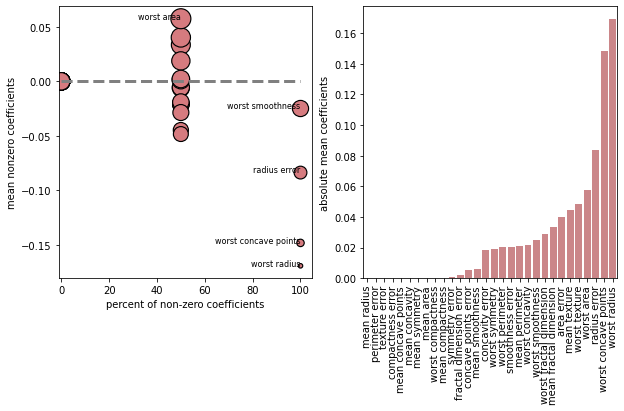

In [9]:
new_EM._show_models_coeffients()

/home/xutingfeng/ukb/project/ppp_prediction/ppp_prediction/model.py:482: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/home/xutingfeng/ukb/project/ppp_prediction/ppp_prediction/model.py:490: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)


<Axes: title={'center': 'Top 10 Features'}, xlabel='Mean of Coefficients', ylabel='Features'>

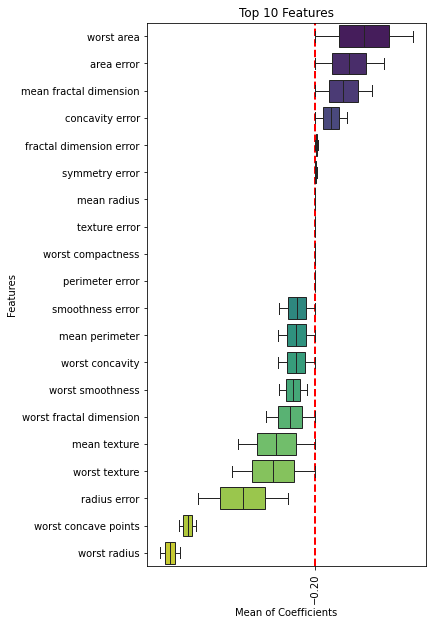

In [10]:
new_EM._plot_top_k_features()

In [11]:
new_EM.predict(train)[:4]

array([0.24193339, 0.30737769, 0.17949377, 0.29529759])

In [12]:
train_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,14.06,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.032510,0.1641,0.05764,...,14.92,25.34,96.42,684.5,0.10660,0.1231,0.0846,0.07911,0.2523,0.06609
396,13.51,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.053810,0.1806,0.06079,...,14.80,27.20,97.33,675.2,0.14280,0.2570,0.3438,0.14530,0.2666,0.07686
397,12.80,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.040830,0.1574,0.05750,...,13.74,21.06,90.72,591.0,0.09534,0.1812,0.1901,0.08296,0.1988,0.07053
398,11.06,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,0.1535,0.06214,...,12.68,20.35,80.79,496.7,0.11200,0.1879,0.2079,0.05556,0.2590,0.09158


In [13]:
new_EM.features

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [14]:
weight_model, train_metrics, test_metrics = new_EM.fit_ensemble_weight(
    train, test, "target"
)

train shape: (400, 3), test shape is (169, 3)
[I] [12:52:41.609220] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (360, 2), val shape is (40, 2), test shape is (169, 2)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


model: Lasso	Best parameters: {'model__alpha': 0.003593813663804626}, with auc: 1.0


In [15]:
new_weight = new_EM.predict(train, method="weight_model")
new_mean = new_EM.predict(train, method="mean")

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
to_eval_df = pd.DataFrame(
    {
        "target": train["target"],
        "new_weight": new_weight,
        "new_mean": new_mean,
    }
)
to_eval_df[["new_weight", "new_mean"]].corr()

,new_weight,new_mean
new_weight,1.000000,0.992543
new_mean,0.992543,1.000000


In [30]:
import numpy as np


def log_likelihood(y_true, y_pred, n):
    """
    Calculate the log-likelihood of a regression model.

    Parameters:
    - y_true: array, true target values
    - y_pred: array, predicted target values by the model
    - n: int, number of observations

    Returns:
    - ll: float, the log-likelihood value
    """
    residuals = y_true - y_pred
    residuals_squared_mean = np.mean(residuals**2)
    ll = -0.5 * n * (1 + np.log(2 * np.pi) + np.log(residuals_squared_mean))
    return ll


def calculate_aic_bic(y_true, y_pred, n, k):
    """
    Calculate AIC and BIC for a regression model.

    Parameters:
    - y_true: array, true target values
    - y_pred: array, predicted target values by the model
    - n: int, number of observations
    - k: int, number of features in the model

    Returns:
    - A tuple containing:
      - AIC: float, Akaike Information Criterion
      - BIC: float, Bayesian Information Criterion
    """
    ll = log_likelihood(y_true, y_pred, n)
    aic = -2 * ll + 2 * k
    bic = -2 * ll + k * np.log(n)
    return aic, bic

In [31]:
calculate_aic_bic(
    to_eval_df["target"], to_eval_df["new_weight"], len(to_eval_df), 30
), AIC_BIC(to_eval_df["target"], to_eval_df["new_mean"], len(to_eval_df), 30),

((104.43795336971323, 224.18188978295268),
 (224.50102473001732, 344.2449611432568))

In [23]:
test_model1 = new_EM.models[0]
test_model1

Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso())])

In [19]:
from ppp_prediction.corr import cal_binary_metrics_bootstrap

cal_binary_metrics_bootstrap(to_eval_df["target"], to_eval_df["new_weight"])

{'AUC': 0.9946525425886786,
 'AUC_UCI': 1.000291113446126,
 'AUC_LCI': 0.990930114465226,
 'ACC': 0.965,
 'ACC_UCI': 0.9825624999999997,
 'ACC_LCI': 0.9474999999999999,
 'Macro_F1': 0.9641943731551434,
 'Macro_F1_UCI': 0.9838888945670065,
 'Macro_F1_LCI': 0.9465263983863937,
 'Sensitivity': 0.9823788541927847,
 'Sensitivity_UCI': 1.0014549565338733,
 'Sensitivity_LCI': 0.9689771180884303,
 'Specificity': 0.9421965312472853,
 'Specificity_UCI': 0.9802014462695356,
 'Specificity_LCI': 0.9090806341031124,
 'APR': 0.9956571628834808,
 'APR_UCI': 1.000443520297162,
 'APR_LCI': 0.9924978029790713,
 'N': 400,
 'N_case': 227,
 'N_control': 173}

In [21]:
cal_binary_metrics_bootstrap(
    to_eval_df["target"], to_eval_df["new_mean"], ci_kwargs={"n_resamples": 500}
)

{'AUC': 0.9948817193348782,
 'AUC_UCI': 0.9998450980516721,
 'AUC_LCI': 0.9913333203589271,
 'ACC': 0.9675,
 'ACC_UCI': 0.9850000000000001,
 'ACC_LCI': 0.9525,
 'Macro_F1': 0.9668263676873122,
 'Macro_F1_UCI': 0.9856359710443129,
 'Macro_F1_LCI': 0.951338096941849,
 'Sensitivity': 0.977973567851113,
 'Sensitivity_UCI': 0.9972315398117285,
 'Sensitivity_LCI': 0.960266344223041,
 'Specificity': 0.9537572248822213,
 'Specificity_UCI': 0.9840101767653499,
 'Specificity_LCI': 0.925468180624749,
 'APR': 0.9959174970082321,
 'APR_UCI': 1.0004696771866546,
 'APR_LCI': 0.993113359543804,
 'N': 400,
 'N_case': 227,
 'N_control': 173}

In [7]:
# EM.models[0].feature_names_in_
scaler = EM.models[0][0]
scaler.feature_names_in_

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype=object)

In [11]:
EM.models[0]["model"].coef_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.03105823,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.15738377, -0.0966257 ,  0.        ,  0.        , -0.04115101,
        0.        ,  0.        , -0.15826356,  0.        ,  0.        ])

In [12]:
get_predict(EM.models[0], train, exclude=["worst concave points"])

array([ 2.78828706e-01,  3.31399052e-01,  2.81103447e-01,  4.48798396e-01,
        4.64642253e-01,  5.49961338e-01,  3.05106334e-01,  4.26381983e-01,
        4.59015115e-01,  2.88465549e-01,  3.79920719e-01,  3.90367063e-01,
        3.44381992e-01,  5.58526808e-01,  4.74130994e-01,  2.93062316e-01,
        3.67788633e-01,  2.27307484e-01,  6.42979285e-02,  7.04298938e-01,
        7.37820262e-01,  9.35773077e-01,  6.02766425e-01, -4.00288119e-02,
        2.10801132e-02,  3.33730138e-01,  3.91533462e-01,  3.32183460e-01,
        2.09466936e-01,  5.40262841e-01,  1.42203785e-01,  4.49358354e-01,
        2.45037768e-01,  1.88711988e-01,  4.08424643e-01,  3.50425968e-01,
        5.01924463e-01,  8.02381728e-01,  5.95321810e-01,  5.60038969e-01,
        5.72839647e-01,  4.40561069e-01,  1.52858024e-01,  4.66498498e-01,
        4.98971335e-01,  3.41594502e-01,  8.95933383e-01,  4.84058908e-01,
        7.15126219e-01,  5.60827566e-01,  7.19257483e-01,  7.30786624e-01,
        7.94838966e-01,  

In [ ]:
def fit_ensemble_weight(self, train_data, test_data, label="label"):
    """
    fit ensemble weight
    """

    train_data = (
        train_data.loc[:, self.features + [label]]
        .copy()
        .dropna()
        .reset_index(drop=True)
    )
    test_data = (
        test_data.loc[:, self.features + [label]].copy().dropna().reset_index(drop=True)
    )

    train_dict = {}
    test_dict = {}

    for model_name, model in zip(self.model_name_list, self.models):
        if hasattr(model, "predict_proba"):
            train_dict[model_name] = model.predict_proba(train_data[self.features])[
                :, 1
            ]
            test_dict[model_name] = model.predict_proba(test_data[self.features])[:, 1]

        else:
            train_dict[model_name] = model.predict(train_data[self.features])
            test_dict[model_name] = model.predict(test_data[self.features])

    train_df = pd.DataFrame(train_dict)
    test_df = pd.DataFrame(test_dict)
    # print(test_data.columns)
    print(test_df)
    train_df["label"] = train_data[label]
    test_df["label"] = test_data[label]

    X_var = self.model_name_list
    print(f"train shape: {train_df.shape}, test shape is {test_df.shape}")

    weight_model, train_metrics, test_metrics, *_ = fit_best_model(
        train_df=train_df,
        test_df=test_df,
        X_var=X_var,
        y_var="label",
        method_list=["Lasso"],
        cv=5,
    )
    # weight_model.features = X_var
    self.weight_model = weight_model
    return weight_model, train_metrics, test_metrics

In [ ]:
weight_model, train_metrics, test_metrics = fit_ensemble_weight(
    EM, train, test, "target"
)

In [ ]:
weight_model["model"].coef_

In [ ]:
test["target"]